![img](./image/image1.jpg)
## &#9312;  The Most Nobel of Prizes
<p><FONT size="2pt" police="Verdana"><b><FONT color="gold">The Nobel Prize</FONT></b> is maybe the world's most well known scientific award. Except for the honor, prestige and substantial prize plutocrat the philanthropist also gets a gold order showing Alfred Nobel( 1833- 1896) who established the prize. Every time it's given to scientists and scholars in the orders chemistry, literature, drugs, physiology or drug, economics, and peace. 
The first Nobel Prize was handed out in 1901, and at that time the Prize was veritably Eurocentric and manly-focused, but currently it's not poisoned in any way whatsoever. 

Well, we are going to find out! The Nobel Foundation has made a dataset available of all prize winners from the launch of the prize, in 1901, to 2016. Let's load it in and take a look. </FONT></p>
<hr> 


#####  1️⃣ Loading in required libraries


In [192]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



#####  2️⃣  Reading in the Nobel Prize data


In [193]:
nobel = pd.read_csv("./Data/nobel.csv")

##### 3️⃣ Taking a look at the 5 first winners


In [194]:
nobel.head(n=5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


<hr>

## &#9313; So, who gets the Nobel Prize?
<p><FONT size="2pt" police="Verdana">Just viewing the primary few prize winners, we have a tendency to see that each one of the winners in 1901 were guys that came from Europe. however that was back in 1901, viewing all winners within the dataset, from 1901 to 2016, that sex and that country is that the most ordinarily represented?</p>
<hr>

#####  1️⃣  Display the number of Nobel Prizes handed out between 1901 and 2016

In [195]:
len(nobel.index)


911


#####  2️⃣ Display the number of prizes won by male and female recipients.

In [196]:
nobel["sex"].value_counts()


Male      836
Female     49
Name: sex, dtype: int64

##### 3️⃣ Display the number of prizes won by the top 10 nationalities


In [197]:
nobel["birth_country"].value_counts().head(10)


United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

<hr>

## &#9314; USA dominance
<p><FONT size="2pt" police="Verdana">Not therefore shocking perhaps: the foremost common Nobelist between 1901 and 2016 was a person born within the USA. however in 1901 all the winners were European. once did the USA begin to dominate the honor charts?</p>
<hr>

#####  1️⃣ Calculating the proportion of USA born winners per decade


In [198]:
nobel['usa_born_winner'] = nobel['birth_country'] == "United States of America"


#####  2️⃣  Calculate the decade



In [199]:
nobel['decade'] = (np.floor(nobel["year"] / 10) * 10).astype(int)


##### 3️⃣ Calculate the average per decade


In [200]:
prop_usa_winners = nobel.groupby("decade",as_index=False)["usa_born_winner"].mean()

## 4️⃣ Display the proportions of winners born in the United States by decade


In [201]:
prop_usa_winners.head()

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


<hr>

## &#9315;  USA dominance, visualized
<p><FONT size="2pt" police="Verdana">A table is OK, however to check once the USA began to dominate the philanthropist charts we'd like a plot!
</p>
<hr>

#####  1️⃣ Setting the plotting theme and setting the size of all plots.


In [202]:
sns.set()
plt.rcParams['figure.figsize'] = [8, 5]

#####  2️⃣  Plotting USA born winners 

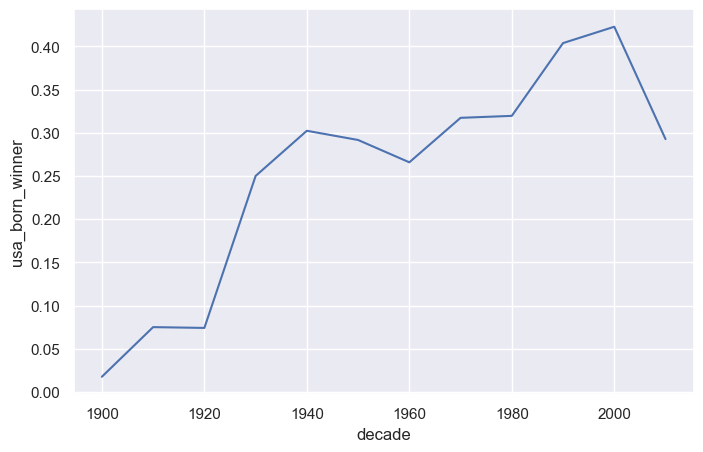

In [203]:
ax = sns.lineplot(x="decade" ,y="usa_born_winner", data=prop_usa_winners)

##### 3️⃣ Adding %-formatting to the y-axis


In [204]:
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

<hr>

## &#9316;  What is the gender of a typical Nobel Prize winner?
<p><FONT size="2pt" police="Verdana">So the USA came the dominating winner of the Nobel Prize first in the 1930s and had kept the commanding position ever agone . But one group that was in the lead from the launch, and noway seems to let go, are men. maybe it shouldn't come as a shock that there is some imbalance between how multitudinous virile and womanish prize winners there are, but how significant is this imbalance? And is it more or worse within specific prize orders like medicines, medicine, literature,etc.?
</p>
<hr>

#####  1️⃣  Calculating the proportion of female laureates per decade

In [205]:
nobel['female_winner'] = nobel["sex"]=="Female"
prop_female_winners = nobel.groupby(["decade","category"], as_index=False)["female_winner"].mean()

#####  2️⃣  Plotting female winners

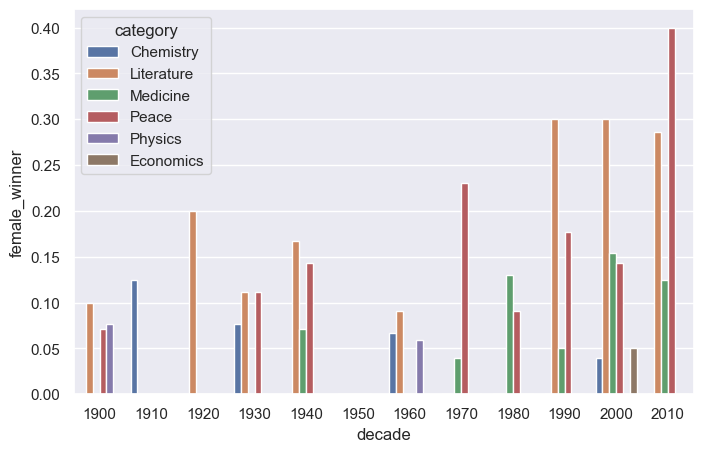

In [206]:
ax = sns.barplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)


##### 3️⃣ Adding %-formatting to the y-axis


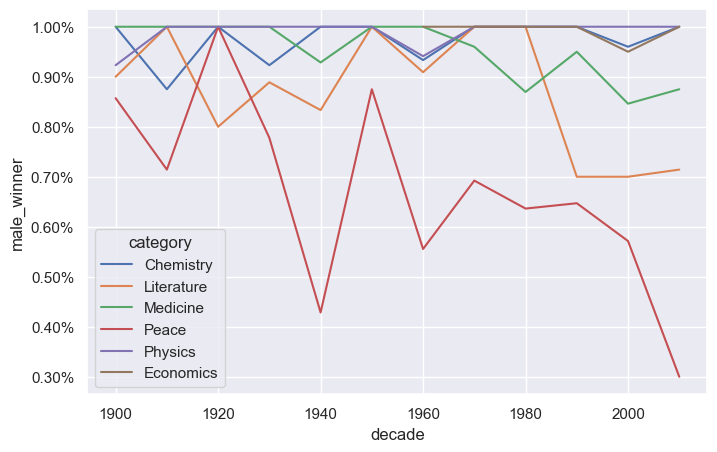

In [207]:
ax = sns.lineplot(x='decade', y='male_winner', data=prop_male_winners, hue='category')
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

<hr>

#####  1️⃣ Calculating the proportion of male laureates per decade

In [208]:
nobel['male_winner'] = nobel["sex"]=="Male"
prop_female_winners = nobel.groupby(["decade","category"], as_index=False)["male_winner"].mean()

#####  2️⃣ Plotting male winners

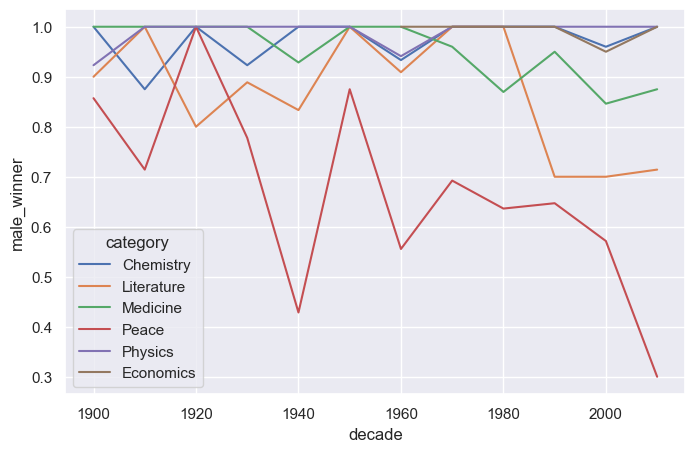

In [209]:
ax = sns.lineplot(x='decade', y='male_winner', data=prop_male_winners, hue='category')


##### 3️⃣ Adding %-formatting to the y-axis

In [210]:
ax.yaxis.set_major_formatter(PercentFormatter())

<hr>

## &#9317;  The first woman and man to win the Nobel Prize
<p><FONT size="2pt" police="Verdana">Given this imbalance, who was the first woman to admit a Nobel Prize? And in what order?</p>
<hr>

#####  1️⃣  Picking out the first woman to win a Nobel Prize

In [211]:
nobel[nobel["sex"]=="Female"].nsmallest(1, columns="year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,False


#####  2️⃣  Picking out the first male to win a Nobel Prize

In [212]:
nobel[nobel["sex"]=="Male"].nsmallest(1, columns="year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False,True


<hr>

 ## &#9318;  Repeat laureates
<p><FONT size="2pt" police="Verdana">For utmost scientists pens activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and many have gotten it further than formerly. Who are these many people?</p>
<hr>


#####  1️⃣  Selecting the laureates that have received 2 or more prizes

In [213]:
nobel.groupby("full_name").filter(lambda group: len(group) >= 2).sort_values("laureate_id")


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,False
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False,True
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1970,False,True
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False,True
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False,True
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False,True
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1980,False,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False,False


<hr>

 ## &#9319;  How old are you when you get the prize?
<p><FONT size="2pt" police="Verdana">The list of reprise winners contains some outstanding names! But how old are you generally when you get the prize?</p>
<hr>


#####  1️⃣  Convert date of birth from string to date time

In [214]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])


#####  2️⃣  Calculation of the age of Nobel laureates

In [215]:
nobel['age'] = nobel["year"] - nobel['birth_date'].dt.year


##### 3️⃣ Tracing the ages of Nobel laureates

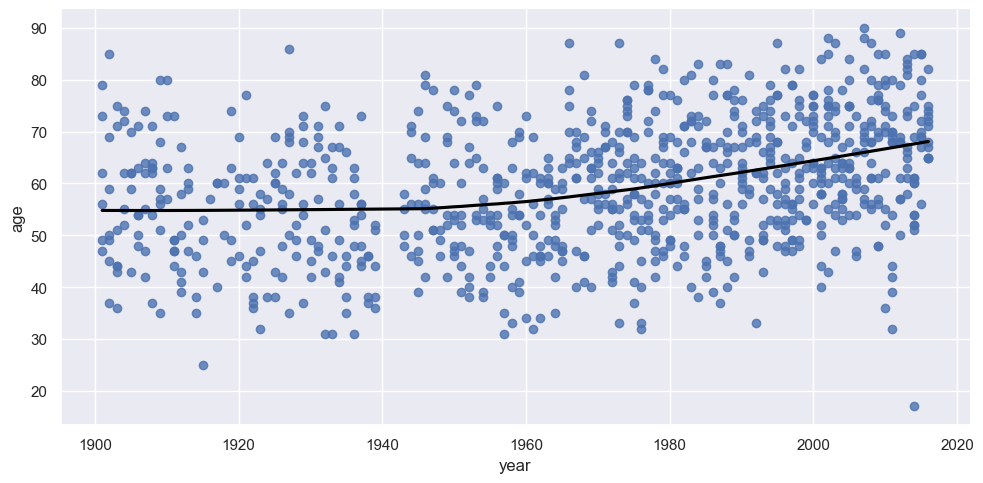

In [216]:
sns.lmplot(x='year',y='age',data=nobel,lowess=True,aspect=2,line_kws={'color': 'black'})


<hr>

## &#9320;  Age differences between prize categories
<p><FONT size="2pt" police="Verdana">The plot over shows us a lot! We see that people use to be around 55 when they entered the price, but currently the normal is near to 65. But there's a large spread in the laureates' periods, and while utmost are 50, some are veritably youthful.

We also see that the viscosity of points is much high currently than in the early 1900s-- currently numerous further of the prizes are participated, and so there are numerous further winners. We also see that there was a dislocation in awarded prizes around the Second World War( 1939- 1945).
Let's look at age trends within different prize orders.
</FONT>
</p><hr>

#####  1️⃣ Same plot as above, but separate plots for each type of Nobel Prize

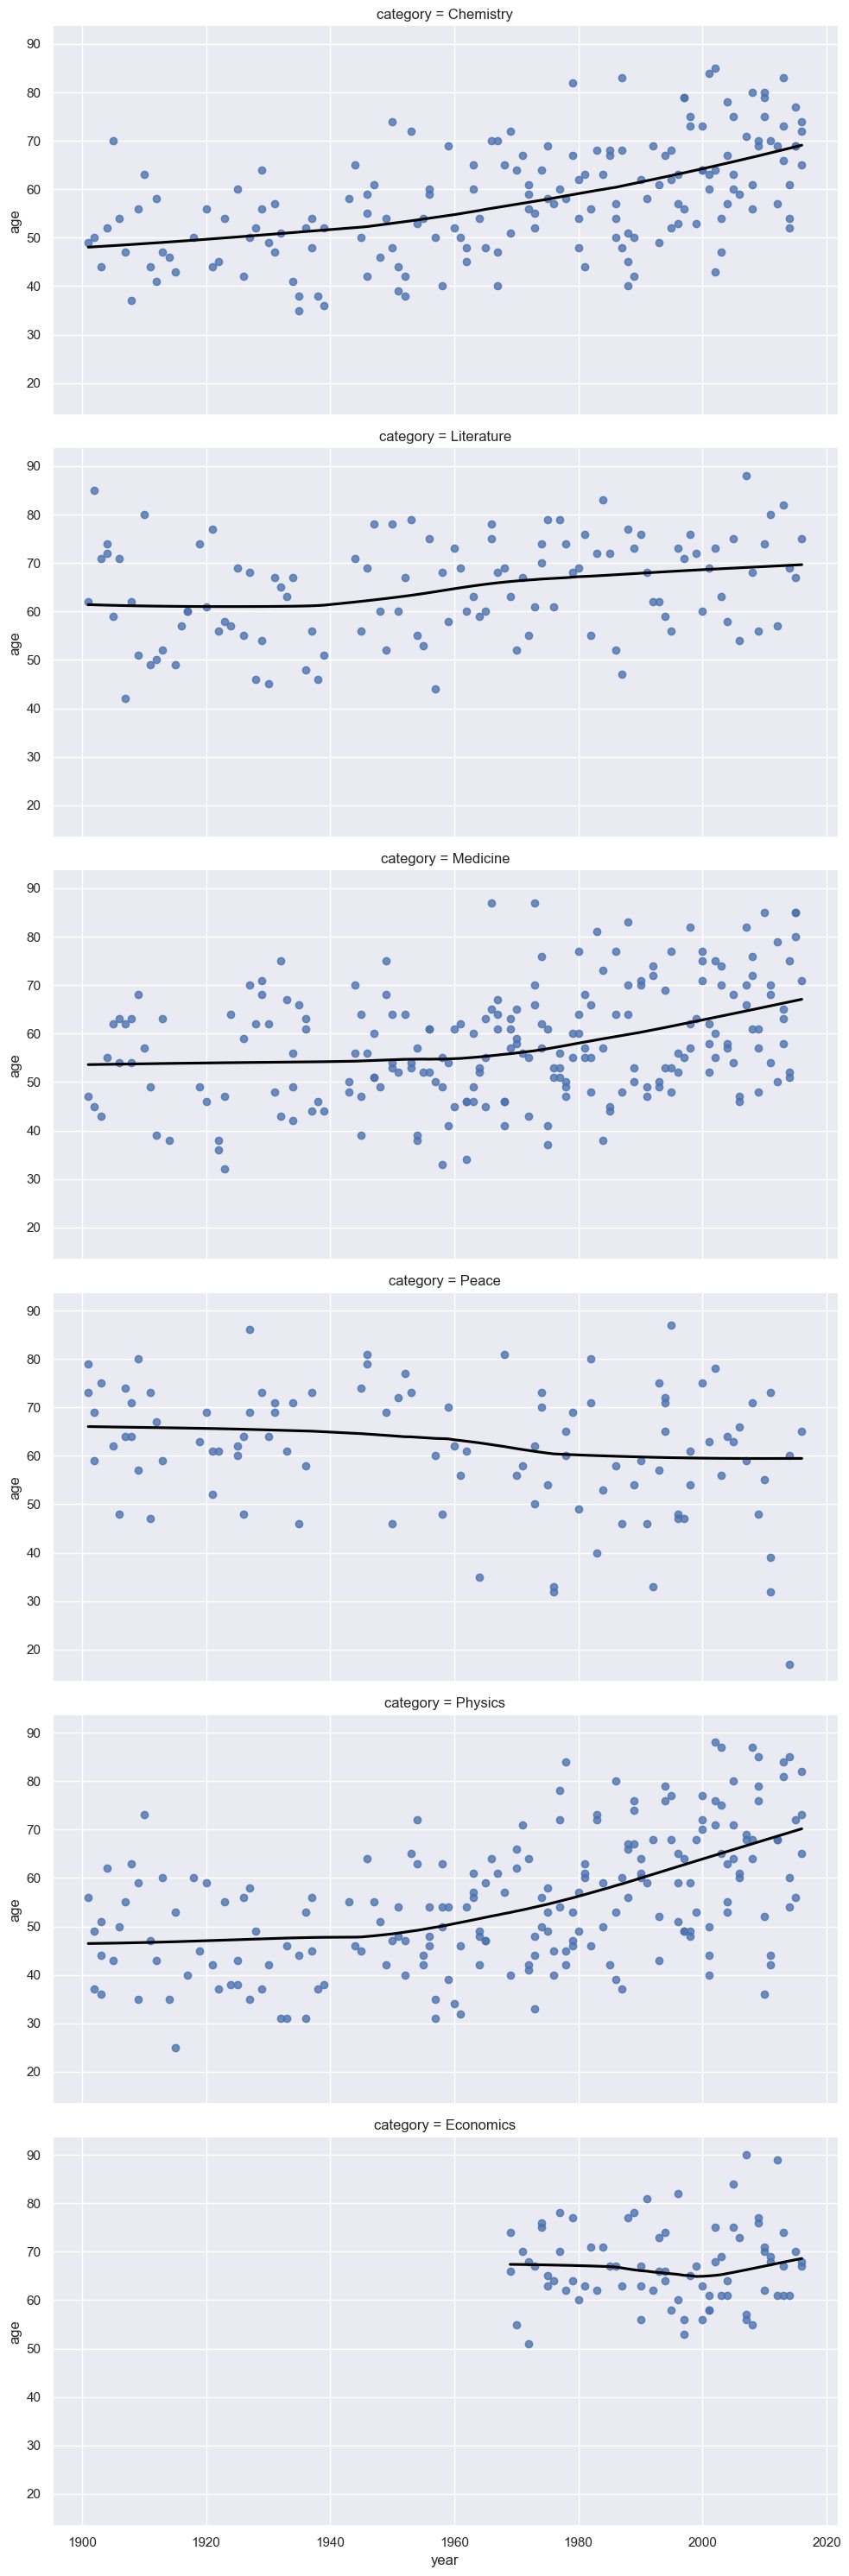

In [217]:
sns.lmplot(x="year", y="age", data=nobel, lowess=True, aspect=2,line_kws={'color' : 'black'}, row='category')

<hr>

## &#9320;  Oldest and youngest winners
<p><FONT size="2pt" police="Verdana">In the peace category we also a winner around 2010 that seems exceptionally young.
This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?
</FONT>
</p><hr>

#####  1️⃣  The oldest winner of a Nobel Prize as of 2016


In [218]:
display(nobel.nlargest(n=1, columns='age'))


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,True,90.0


#####  2️⃣  The youngest winner of a Nobel Prize as of 2016

In [219]:
display(nobel.nsmallest(1, 'age'))


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,male_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,False,2010,True,False,17.0


<hr>

## &#9321;  Name of the youngest winner!
<p><FONT size="2pt" police="Verdana">
What was the name of the youngest winner in history who, in 2014, received the prize for her fight against the repression of children and young people and for the right of all children to education?</p><hr>

#####  1️⃣  The name of the youngest Nobel laureate in 2016


In [220]:
youngest_winner = nobel.nsmallest(n=1, columns='age')['full_name'].iloc[0]
youngest_winner

'Malala Yousafzai'